#### Header

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [2]:
plt.rc("font", size=12)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [3]:
xl = pd.ExcelFile("cpd merged final v1.xlsx")
data = xl.parse("cpd merged final")
print(data.shape)

(650, 74)


#### Touchpoint 1

count    650.000000
mean      28.070769
std        5.859519
min       18.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       49.000000
Name: 6. How old are you? , dtype: float64


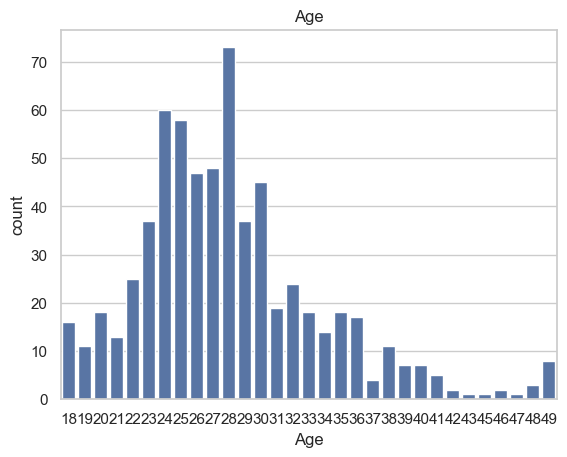

In [4]:
# create a bin for the age range
print(data['6. How old are you? '].describe())

sns.countplot(x='6. How old are you? ', data=data)
plt.title(label='Age')
plt.xlabel("Age")
plt.show()

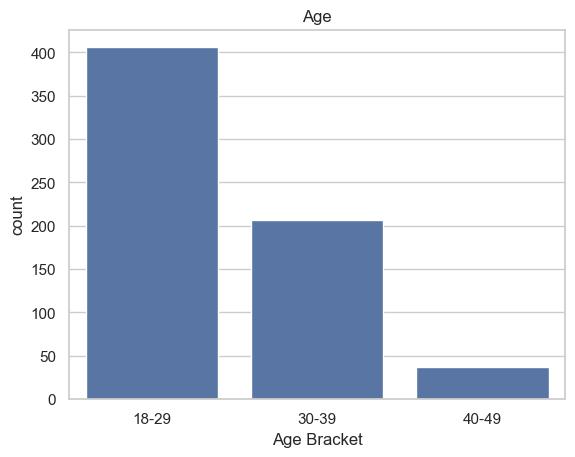

In [12]:
cdata1 = pd.DataFrame()     # Dataframe for conversion 1
temp = pd.DataFrame()
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=new_age_labels, right=False)

sns.countplot(x='age_bracket', data=temp)
plt.title(label='Age')
plt.xlabel("Age Bracket")
plt.show()

In [120]:
cdata1['age_bracket'].head()

0    1
1    0
2    1
3    0
4    1
Name: age_bracket, dtype: category
Categories (3, int64): [0 < 1 < 2]

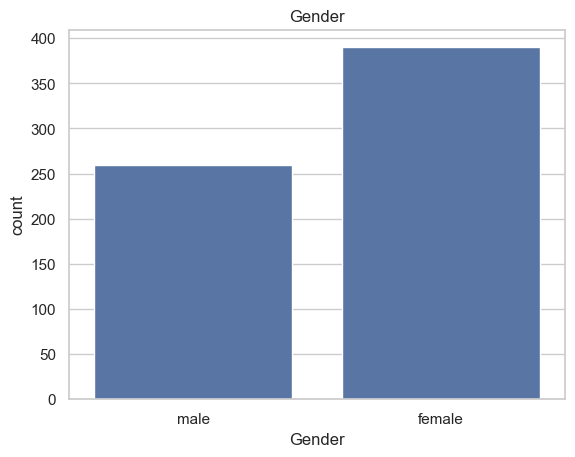

In [16]:
cdata1['female'] = data['female']
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['female'] = pd.cut(cdata1['female'], bins=sex_bins, labels=sex_labels, right=False)
sns.countplot(x='female', data=temp)
plt.title(label='Gender')
plt.xlabel("Gender")



plt.show()

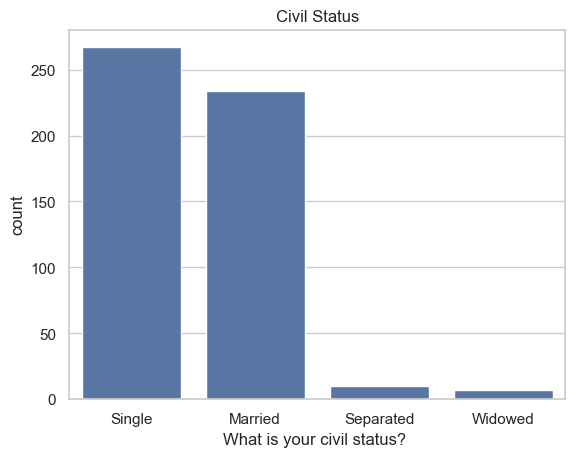

In [18]:
cdata1['civil'] = data['civil']

civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

sns.countplot(x='civil', data=temp)
plt.title(label='Civil Status')
plt.xlabel("What is your civil status? ")
plt.show()

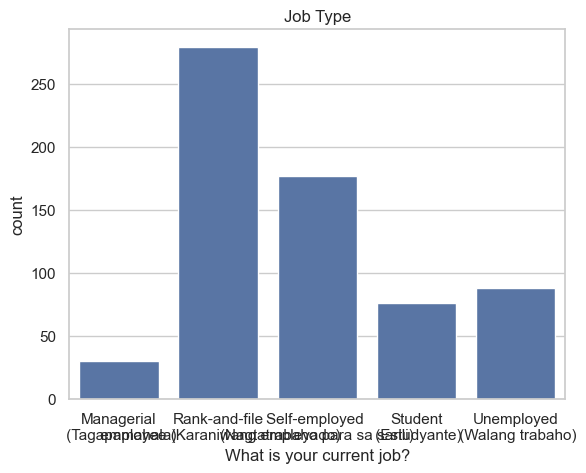

In [22]:
cdata1['job_type'] = data['job type']

labels = ['Managerial\n (Tagapamahala)','Rank-and-file\n employee (Karaniwang empleyado)','Self-employed \n(Nagtatrabaho para sa sarili)',
          'Student\n (Estudyante)','Unemployed\n (Walang trabaho)']
bins =[1,2,3,4,5,99]
temp['job_type'] = pd.cut(cdata1['job_type'] , bins=bins, labels=labels, right=False)

sns.countplot(x='job_type', data=temp)
plt.title(label='Job Type')
plt.xlabel("What is your current job?")
plt.show()

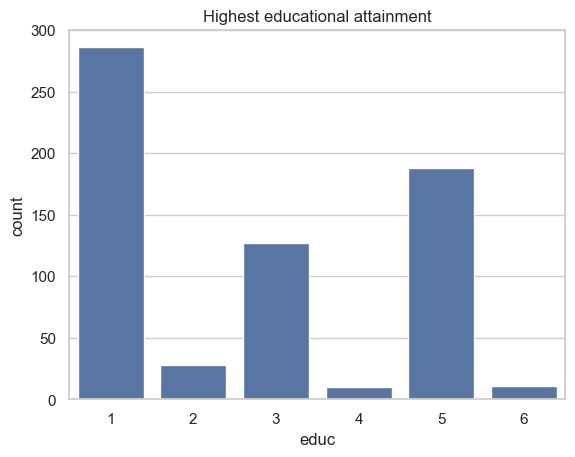

In [124]:
cdata1['educ'] = data['educ']
sns.countplot(x='educ', data=cdata1)
plt.title(label='Highest educational attainment')
plt.show()

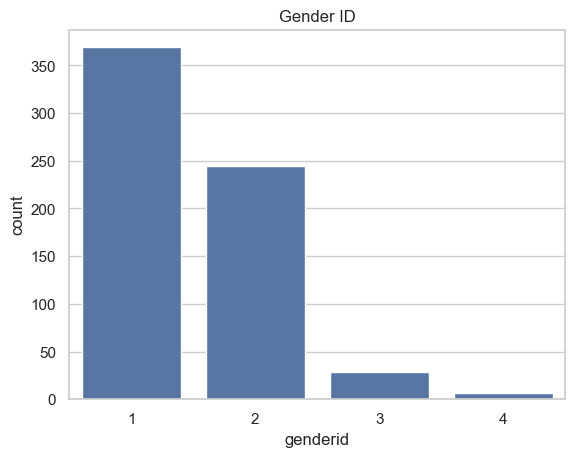

In [125]:
cdata1['genderid'] = data['genderid']
sns.countplot(x='genderid', data=cdata1)
plt.title(label='Gender ID')
plt.show()

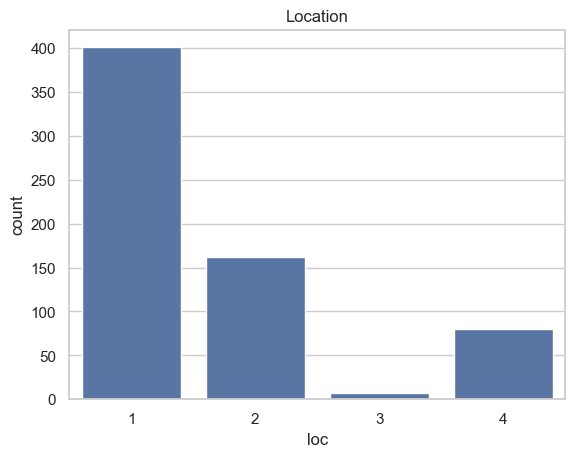

In [126]:
cdata1['loc'] = data['loc']
sns.countplot(x='loc', data=cdata1)
plt.title(label='Location')
plt.show()

In [127]:
# Conversion 1
cdata1['conversion1'] = data['conversion1']
cdata1['conversion1'].value_counts()

conversion1
1.0    401
0.0    117
Name: count, dtype: int64

In [128]:
# Drop Nulll
print(cdata1.shape)
cdata1 = cdata1.dropna()
print(cdata1.shape)

(650, 8)
(518, 8)


In [129]:
#X = cdata1[['job_type']]
X = cdata1[['age_bracket', 'female', 'civil', 'job_type', 'educ', 'genderid']]
y = cdata1['conversion1']

model = sm.Logit(y, X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.501712
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Jan 2025   Pseudo R-squ.:                 0.06088
Time:                        10:49:34   Log-Likelihood:                -259.89
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 2.739e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.2728      0.178     -1.532      0.125      -0.622      

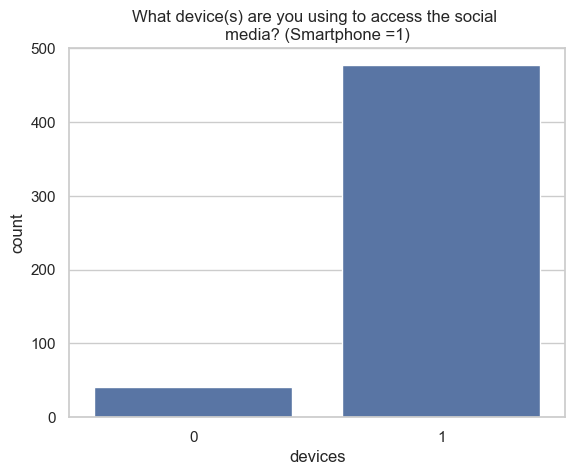

In [130]:
cdata1['devices'] = data['devices']
sns.countplot(x='devices', data=cdata1)
plt.title(label='What device(s) are you using to access the social \nmedia? (Smartphone =1)')
plt.show()

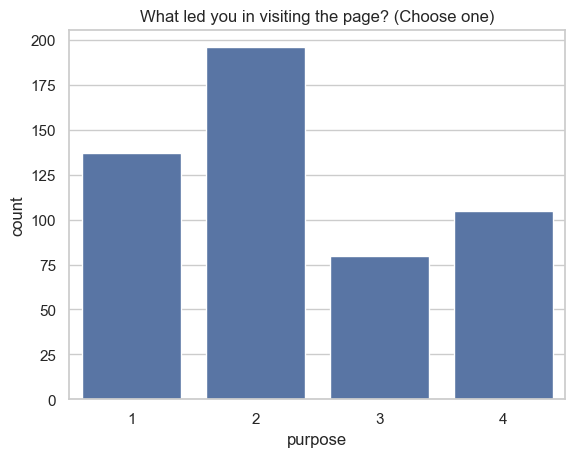

In [131]:
cdata1['purpose'] = data['purpose page']
sns.countplot(x='purpose', data=cdata1)
plt.title(label='What led you in visiting the page? (Choose one)')
plt.show()

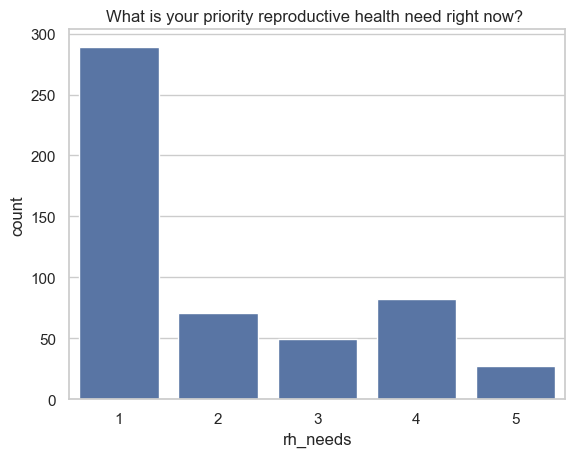

In [132]:
cdata1['rh_needs'] = data['perceived rh needs']
sns.countplot(x='rh_needs', data=cdata1)
plt.title(label='What is your priority reproductive health need right now? ')
plt.show()

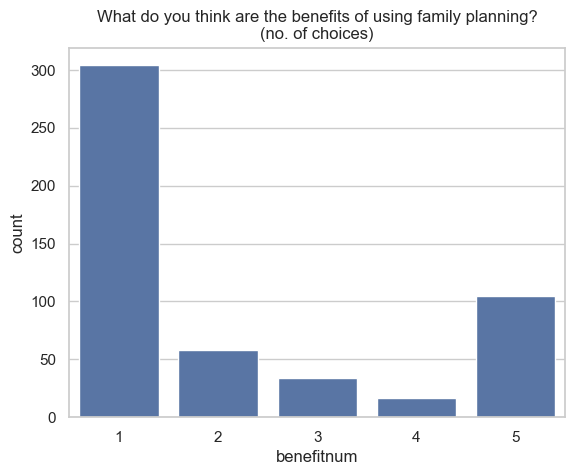

In [133]:
cdata1['benefitnum'] = data['benefitnum']
sns.countplot(x='benefitnum', data=cdata1)
plt.title(label='What do you think are the benefits of using family planning?\n(no. of choices)')
plt.show()

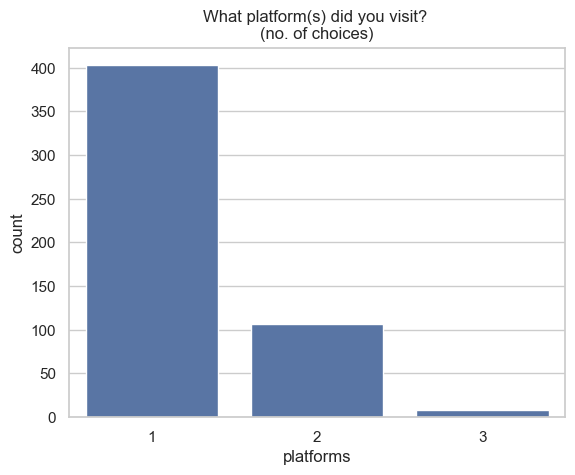

In [134]:
cdata1['platforms'] = data['platforms']
sns.countplot(x='platforms', data=cdata1)
plt.title(label='What platform(s) did you visit? \n(no. of choices)')
plt.show()

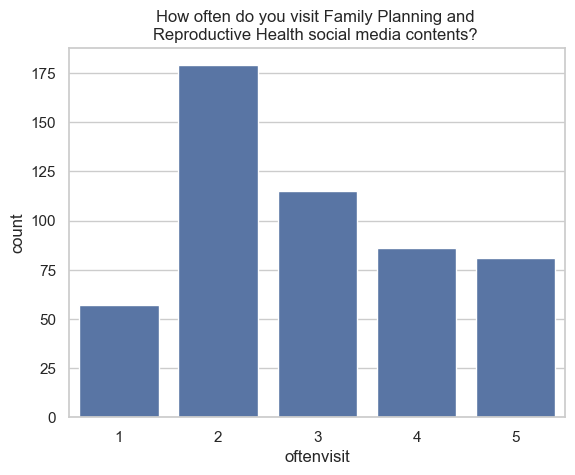

In [135]:
cdata1['oftenvisit'] = data['oftenvisit']
sns.countplot(x='oftenvisit', data=cdata1)
plt.title(label='How often do you visit Family Planning and \nReproductive Health social media contents? ')
plt.show()

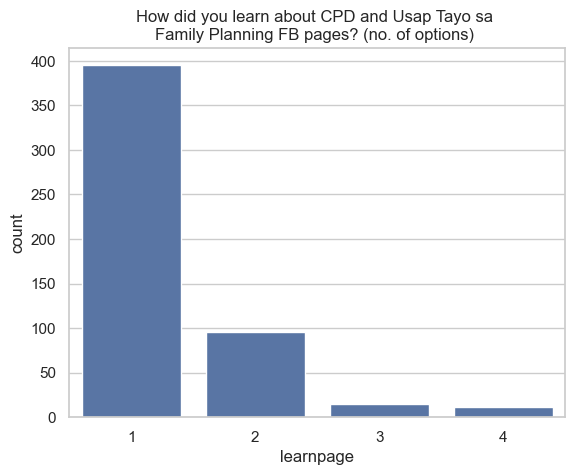

In [136]:
cdata1['learnpage'] = data['learnpage']
sns.countplot(x='learnpage', data=cdata1)
plt.title(label='How did you learn about CPD and Usap Tayo sa \nFamily Planning FB pages? (no. of options) ')
plt.show()

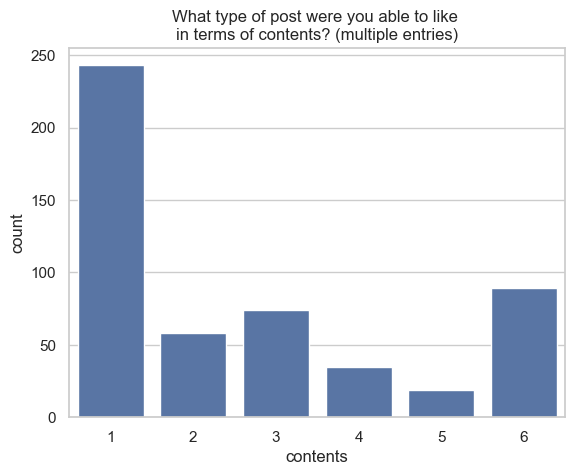

In [137]:
cdata1['contents'] = data['contents']
sns.countplot(x='contents', data=cdata1)
plt.title(label='What type of post were you able to like \nin terms of contents? (multiple entries)')
plt.show()

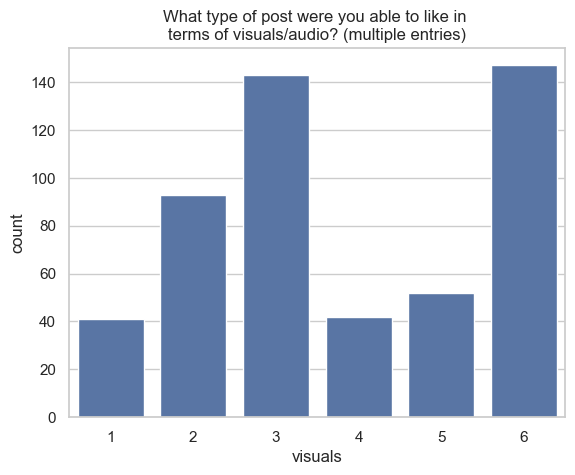

In [138]:
cdata1['visuals'] = data['visuals']
sns.countplot(x='visuals', data=cdata1)
plt.title(label='What type of post were you able to like in \nterms of visuals/audio? (multiple entries)')
plt.show()

In [139]:
# Expand Civil Status
cdata1['civil_single'] = np.where(cdata1['civil'] == 1, 1, 0)
cdata1['civil_married'] = np.where(cdata1['civil'] == 2, 1, 0)
cdata1['civil_separated'] = np.where(cdata1['civil'] == 3, 1, 0)
cdata1['civil_widowed'] = np.where(cdata1['civil'] == 4, 1, 0)



In [140]:
X = cdata1[['age_bracket', 'female', 'civil', 'job_type', 'educ', 'genderid', 'devices',
            'purpose', 'rh_needs', 'benefitnum', 'platforms', 'oftenvisit', 'learnpage',
            'contents','visuals']]
y = cdata1['conversion1']

model = sm.Logit(y, X.astype(int)) 
result = model.fit()  

print("\n\nDemographics and Internet vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.477571
         Iterations 6


Demographics and Internet vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                           14
Date:                Thu, 16 Jan 2025   Pseudo R-squ.:                  0.1061
Time:                        10:49:35   Log-Likelihood:                -247.38
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 1.976e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.2554      0.189     -1.348      0.178     

#### Touchpoint 2

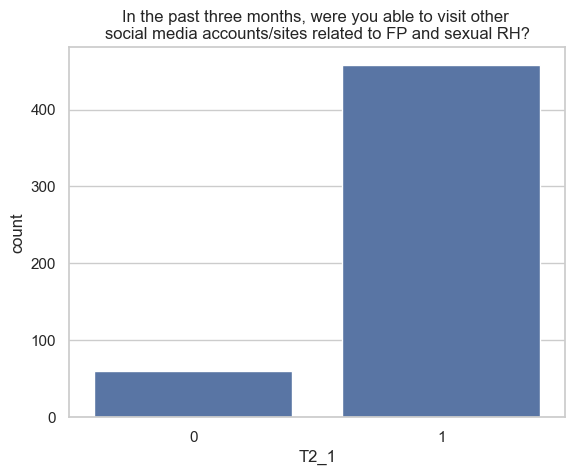

In [151]:
cdata1['T2_1'] = data['social']
cdata1['T2_1'] = cdata1['T2_1'].round().astype(int)
sns.countplot(x='T2_1', data=cdata1)
plt.title(label='In the past three months, were you able to visit other \nsocial media accounts/sites related to FP and sexual RH?')
plt.show()